The problem to be solved in this data mining project is customer churn prediction in the telecom industry. The goal is to analyze customer data and identify patterns that indicate the likelihood of a customer leaving the company. By predicting churn in advance, the telecom company can take proactive measures to retain customers, reduce revenue loss, and improve customer satisfaction.

Problem Statement:
Customer churn, or the loss of subscribers, is a major issue for telecom companies as it directly impacts revenue and growth. The company needs to identify which customers are at high risk of leaving and understand the key factors contributing to churn. By leveraging historical data and machine learning models, the company can predict churn and implement targeted retention strategies.

How the Company Will Benefit from the Solution:
1) Reduced Customer Attrition: By identifying customers likely to
churn, the company can take proactive steps such as offering discounts, better service plans, or improved customer support to retain them.

2) Improved Customer Satisfaction: Understanding the reasons behind churn allows the company to address customer concerns and enhance service quality.

3) Optimized Marketing Strategies: The company can personalize offers and promotions for customers at risk of leaving, increasing the effectiveness of marketing efforts.

4) Increased Revenue: Reducing churn helps maintain a stable customer base, leading to consistent revenue and business growth.

5) Operational Efficiency: Insights from the analysis can help the company streamline operations, allocate resources effectively, and improve overall service offerings.





In [1]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("/content/Customer-Churn (1).csv")

In [3]:
# Display basic info and first few rows to understand the structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convert 'TotalCharges' to numeric, forcing errors='coerce' to handle potential non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Checking for missing values and print missing values
missing_values = df.isnull().sum()
print(missing_values)





customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
# Dropping rows where 'TotalCharges' is missing (since it was coerced to NaN)
df.dropna(subset=['TotalCharges'], inplace=True)

In [13]:

# Checking for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [14]:

# Dropping duplicate rows if any exist
df.drop_duplicates(inplace=True)

In [15]:

# Checking for outliers in numerical columns (using IQR method)
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")
    # Remove outliers if needed
    # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



Outliers in SeniorCitizen:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV    Male              1      No         No       1   
30    3841-NFECX  Female              1     Yes         No      71   
31    4929-XIHVW    Male              1     Yes         No       2   
34    3413-BMNZE    Male              1      No         No       1   
50    8012-SOUDQ  Female              1      No         No      43   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  Female              1     Yes         No      63   
7029  2235-DWLJU  Female              1      No         No       6   
7031  3605-JISKB    Male              1     Yes         No      55   
7032  6894-LFHLY    Male              1      No         No       1   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             No  No phone service             DSL      

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Set plot style
plt.style.use("ggplot")

In [23]:

# Define key features to analyze against the target variable 'Churn'
key_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService']

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

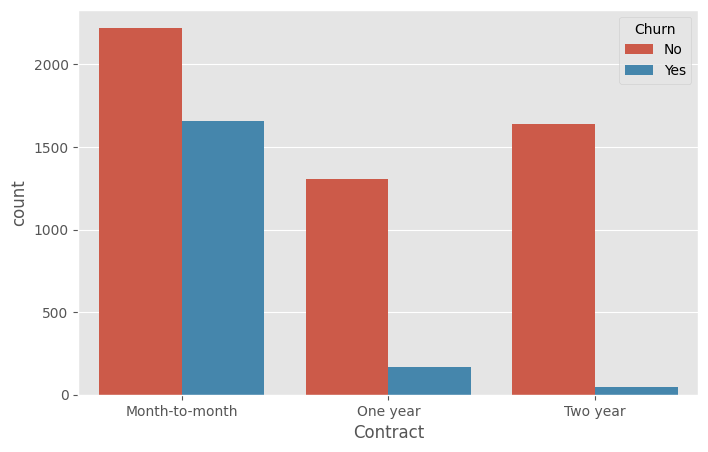

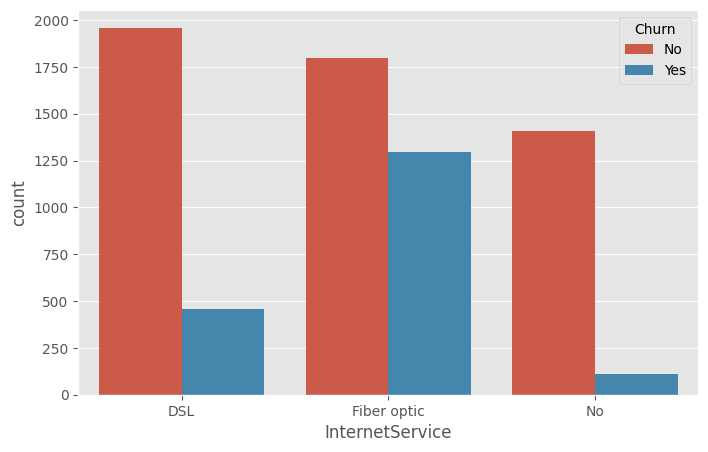

In [25]:
# Create visualizations for key features
for feature in key_features:
    plt.figure(figsize=(8, 5))
    if df[feature].dtype == 'object':
        # Categorical features: Use count plot
        sns.countplot(data=df, x=feature, hue="Churn");

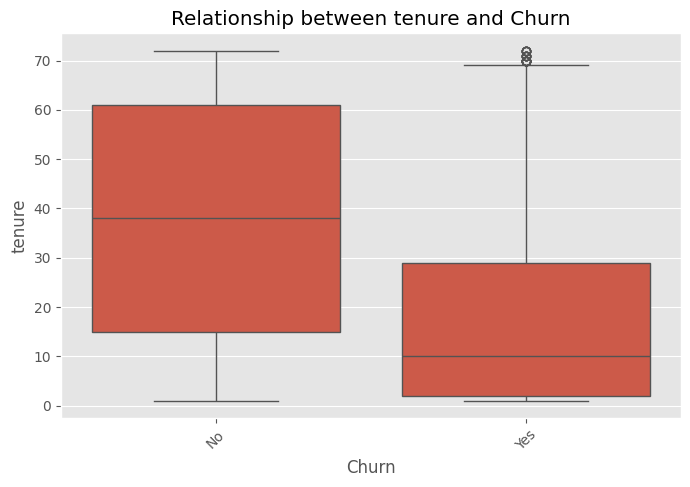

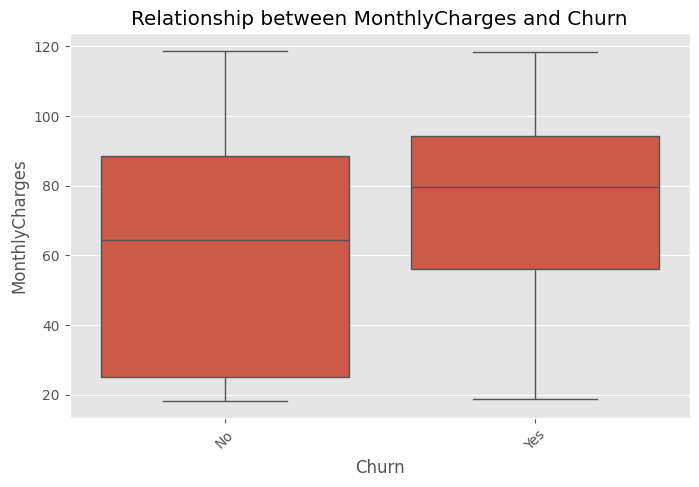

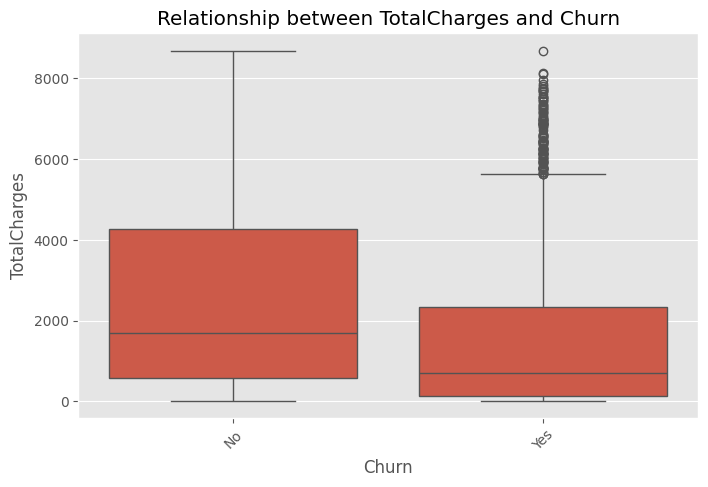

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create visualizations for key features
for feature in key_features:
    if df[feature].dtype in [np.int64, np.float64]:  # Check if the feature is numerical
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x="Churn", y=feature)
        plt.title(f'Relationship between {feature} and Churn')
        plt.xticks(rotation=45)
        plt.show()

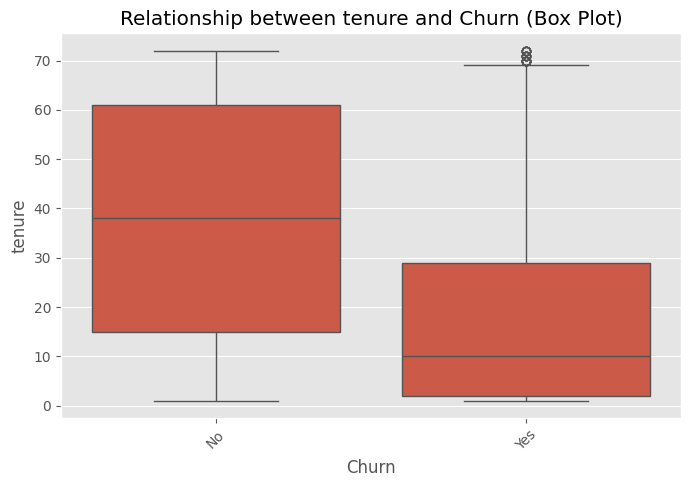

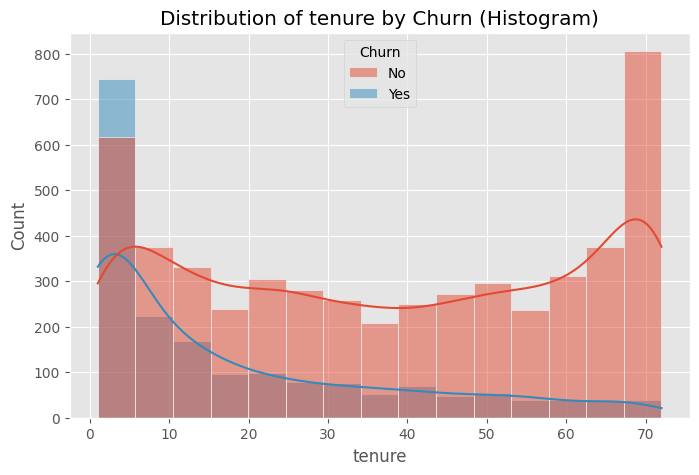

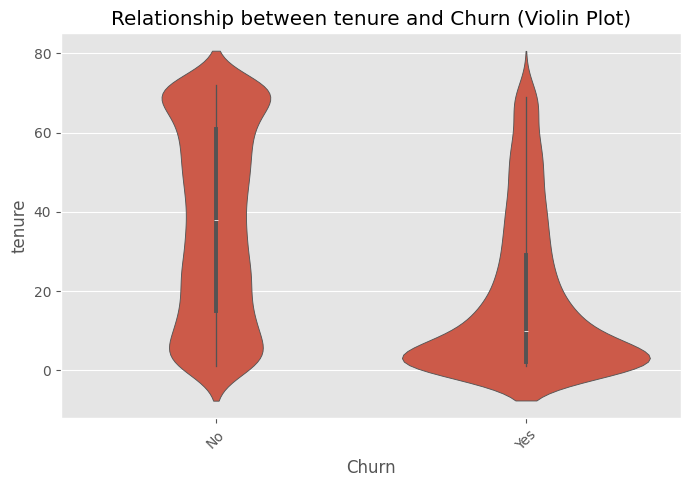

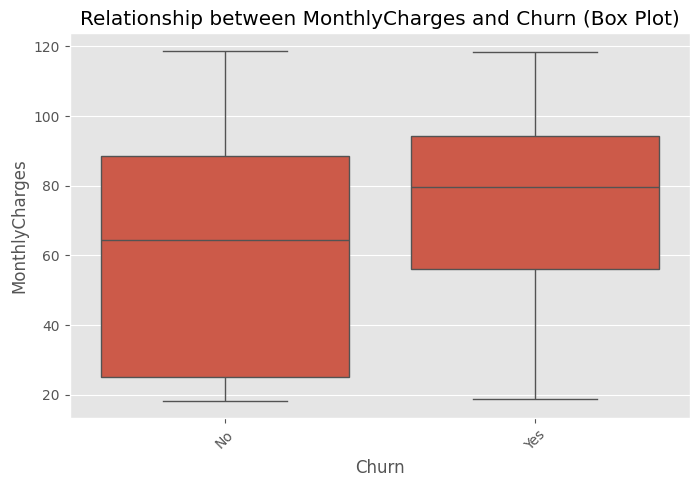

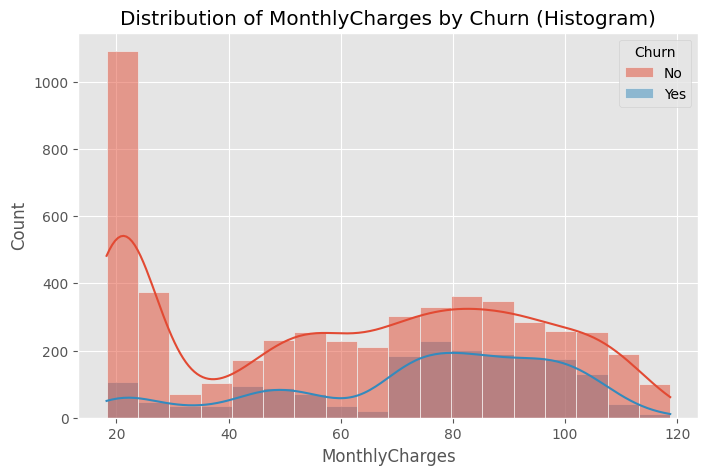

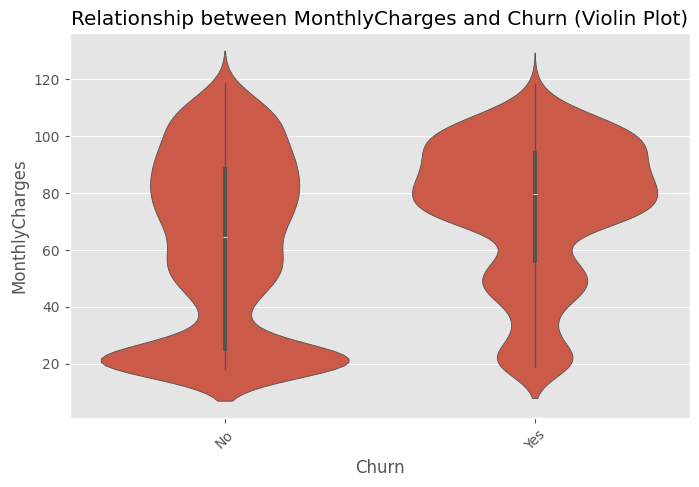

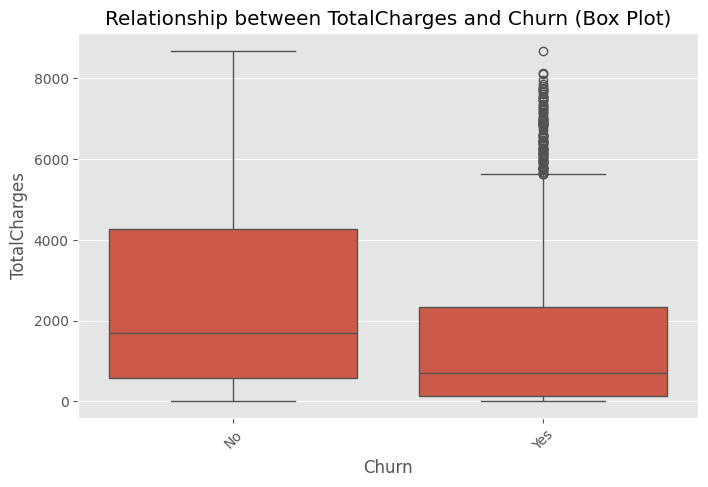

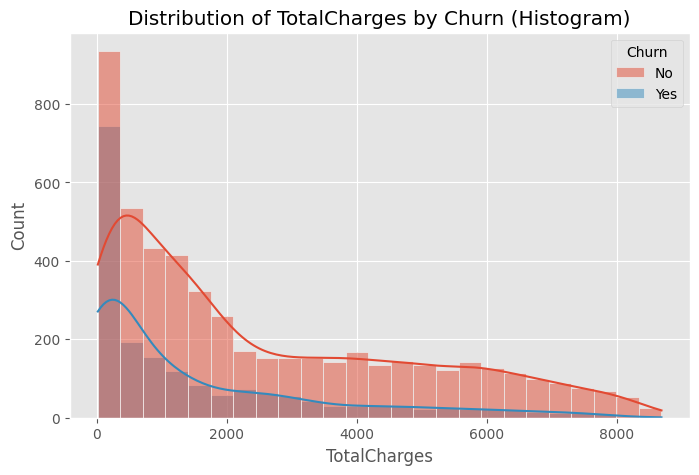

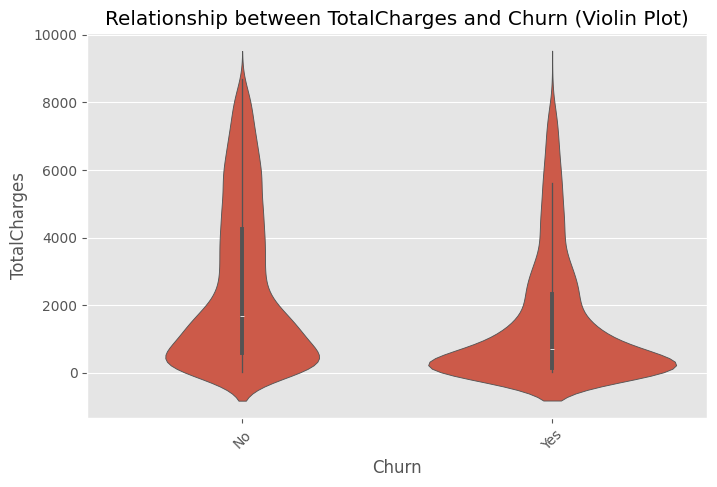

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create visualizations for key features
for feature in key_features:
    if df[feature].dtype in [np.int64, np.float64]:  # Check if the feature is numerical
        # Box plot
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x="Churn", y=feature)
        plt.title(f'Relationship between {feature} and Churn (Box Plot)')
        plt.xticks(rotation=45)
        plt.show()

        # Histogram
        plt.figure(figsize=(8, 5))
        sns.histplot(data=df, x=feature, hue="Churn", kde=True)  # kde adds a density curve
        plt.title(f'Distribution of {feature} by Churn (Histogram)')
        plt.show()

        # Violin plot
        plt.figure(figsize=(8, 5))
        sns.violinplot(data=df, x="Churn", y=feature)
        plt.title(f'Relationship between {feature} and Churn (Violin Plot)')
        plt.xticks(rotation=45)
        plt.show()



**The visualizations show key relationships between customer churn and important features:

Tenure vs. Churn (Boxplot)

Customers with lower tenure are more likely to churn, suggesting that newer customers are at higher risk of leaving.
Monthly Charges vs. Churn (Boxplot)

Higher monthly charges seem to be associated with higher churn rates, possibly due to affordability issues.
Total Charges vs. Churn (Boxplot)

Customers with lower total charges have a higher tendency to churn, which aligns with the tenure observation (new customers contribute to lower total charges).
Contract Type vs. Churn (Countplot)

Month-to-month contract holders have the highest churn rate, while customers with one or two-year contracts are more stable.
Internet Service Type vs. Churn (Countplot)

Fiber optic customers exhibit higher churn rates compared to DSL and no-internet service customers, possibly due to service dissatisfaction or pricing.
These insights help in understanding churn behavior and can guide retention strategies. Would you like to proceed with feature selection or build a predictive model? ​**

In [32]:
# Convert categorical features to numerical for correlation analysis
df_encoded = df.copy()

In [33]:

# Encoding binary categorical features
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

In [34]:

# Encoding categorical variables using ordinal encoding where necessary
categorical_mappings = {
    'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
    'InternetService': {'No': 0, 'DSL': 1, 'Fiber optic': 2},
    'OnlineSecurity': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'OnlineBackup': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'DeviceProtection': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'TechSupport': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'StreamingTV': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'StreamingMovies': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'PaymentMethod': {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
}

In [35]:
# Apply encoding
for col, mapping in categorical_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)


In [37]:
# Drop the 'customerID' column as it is not relevant for correlation analysis
df_encoded = df_encoded.drop(columns=['customerID'])

# Compute correlation matrix
correlation_matrix_all = df_encoded.corr()

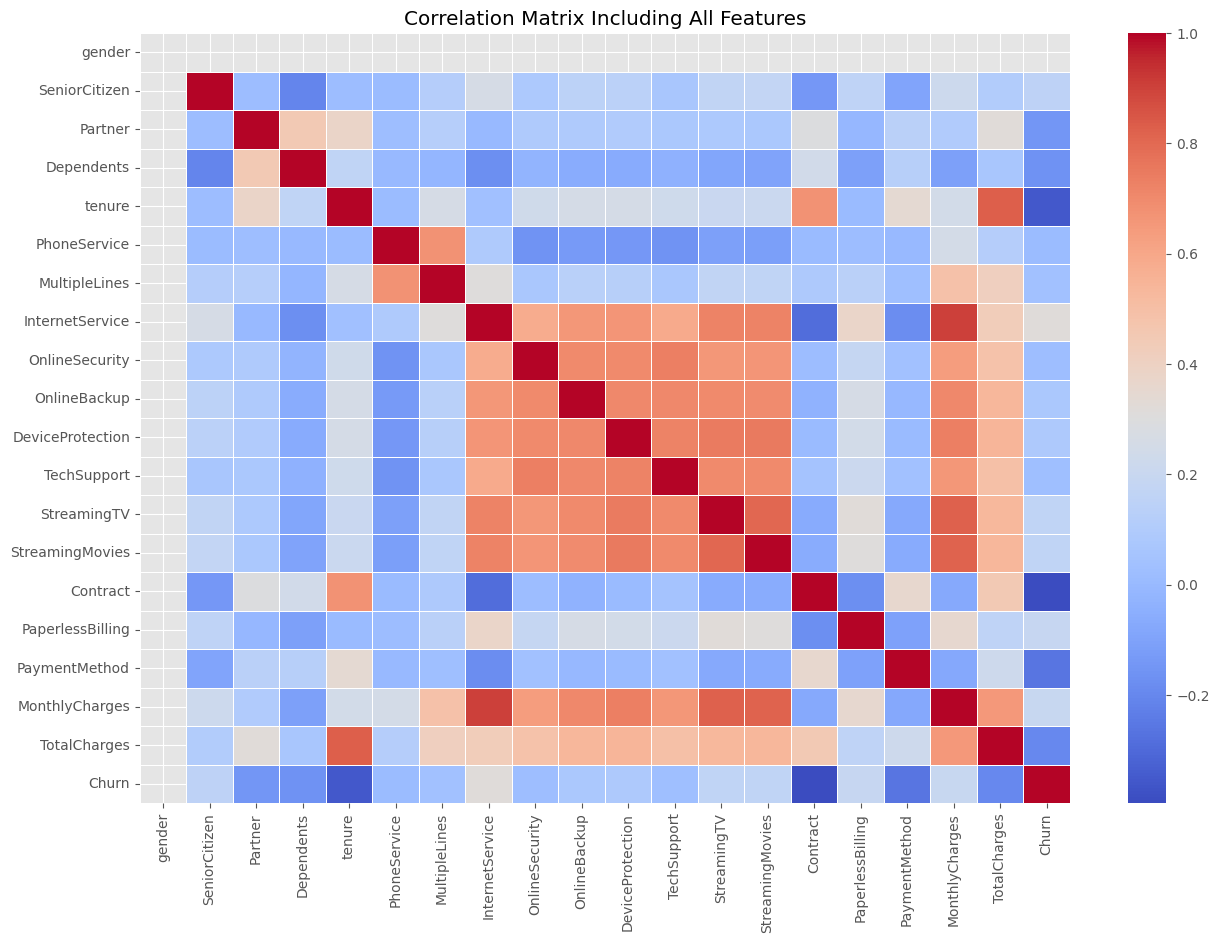

In [41]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_all, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Including All Features")
plt.show()



**Key Correlation Insights with Churn:
Positive Correlations (Factors Increasing Churn Risk):

Internet Service Type (0.32): Fiber optic customers have a higher churn rate.
Monthly Charges (0.19): Higher charges increase churn likelihood.
Paperless Billing (0.19): Customers who opt for paperless billing are more likely to churn.
StreamingTV & StreamingMovies (~0.16): Customers using these services churn more, possibly due to higher costs.
Senior Citizens (0.15): Older customers have a slightly higher churn rate.
Negative Correlations (Factors Reducing Churn Risk):

Contract Type (-0.40): Customers with longer contracts are less likely to churn.
Tenure (-0.35): Customers with a longer tenure are more loyal.
Total Charges (-0.20): Higher total charges indicate long-term customers, reducing churn.
Payment Method (-0.26): Automatic payments (bank transfers, credit cards) reduce churn.
Dependents & Partner (-0.16 & -0.15): Customers with families are less likely to leave.
Uncorrelated Features:

Gender has no significant correlation (NaN), meaning churn is independent of gender.
This confirms that contract length, tenure, and total charges are strong churn predictors, while internet service type and monthly charges increase churn risk**

In [42]:
# Display correlation of features with 'Churn' sorted in descending order
churn_correlation = correlation_matrix_all['Churn'].sort_values(ascending=False)
churn_correlation

,Churn
Churn,1.000000
InternetService,0.316350
MonthlyCharges,0.192858
PaperlessBilling,0.191454
StreamingTV,0.164509
StreamingMovies,0.162672
SeniorCitizen,0.150541
DeviceProtection,0.084402
OnlineBackup,0.073934
MultipleLines,0.036148


<Figure size 1200x800 with 0 Axes>

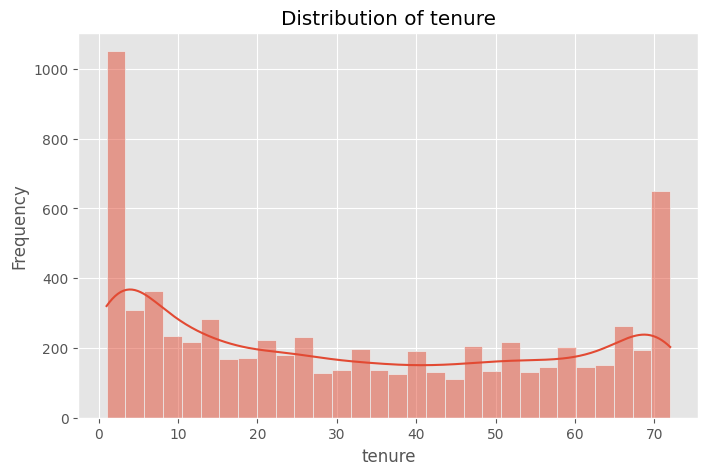

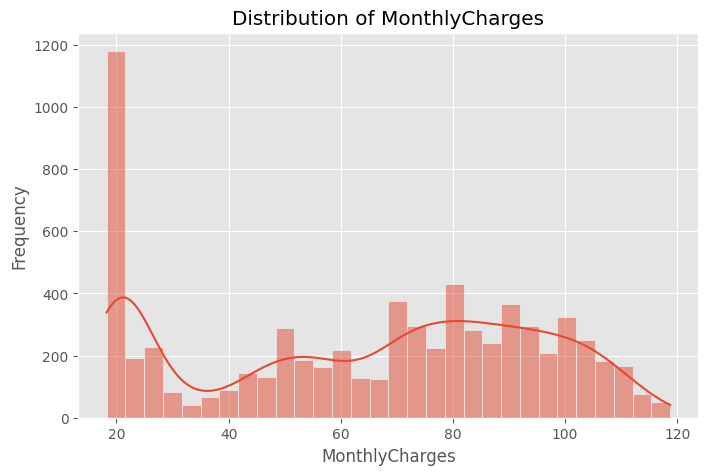

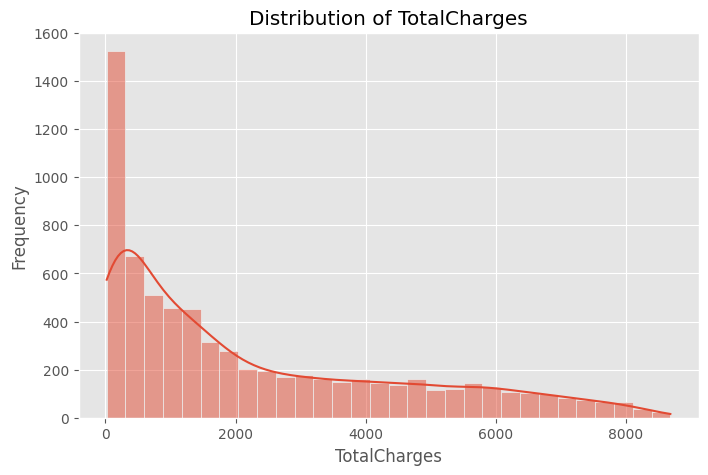

In [44]:
# Univariate Analysis - Exploring individual feature distributions

# Set figure size
plt.figure(figsize=(12, 8))

# Univariate analysis for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

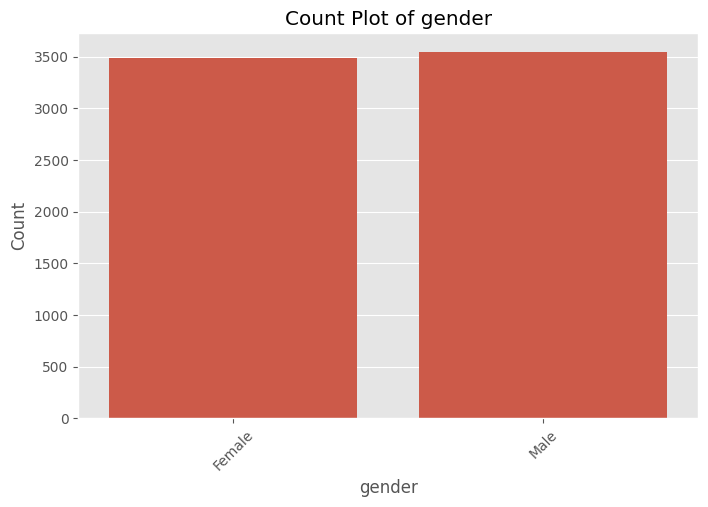

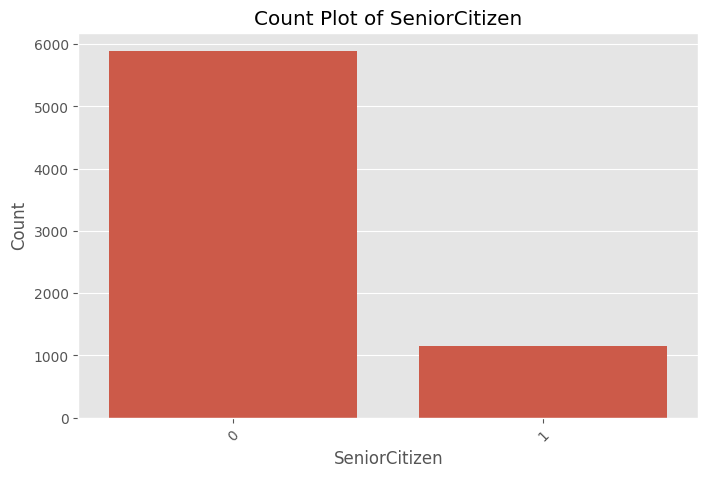

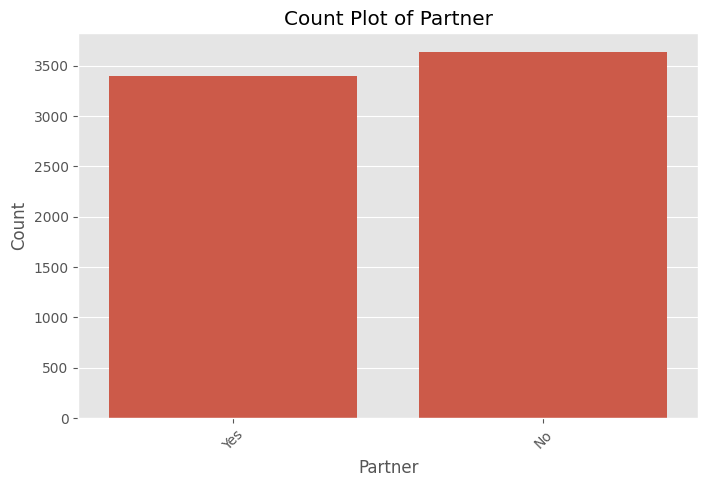

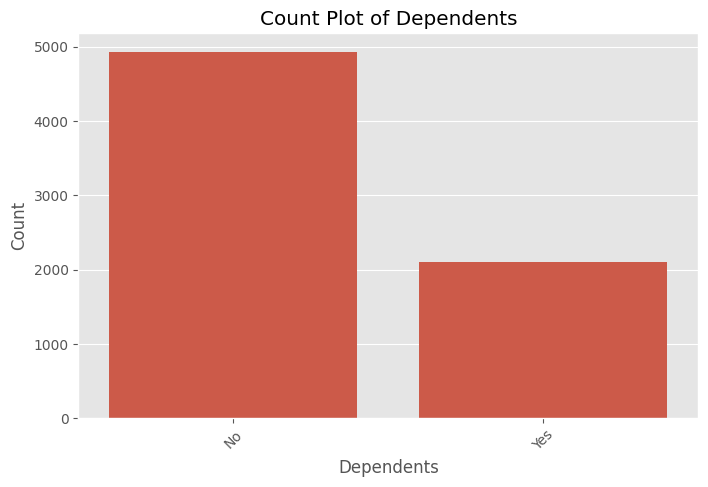

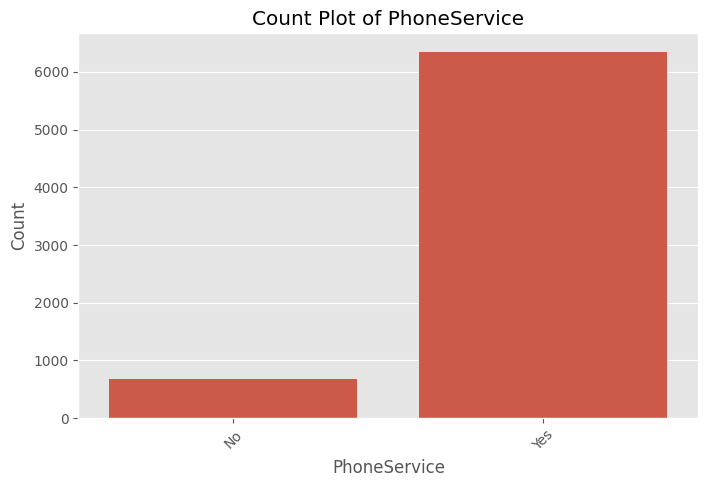

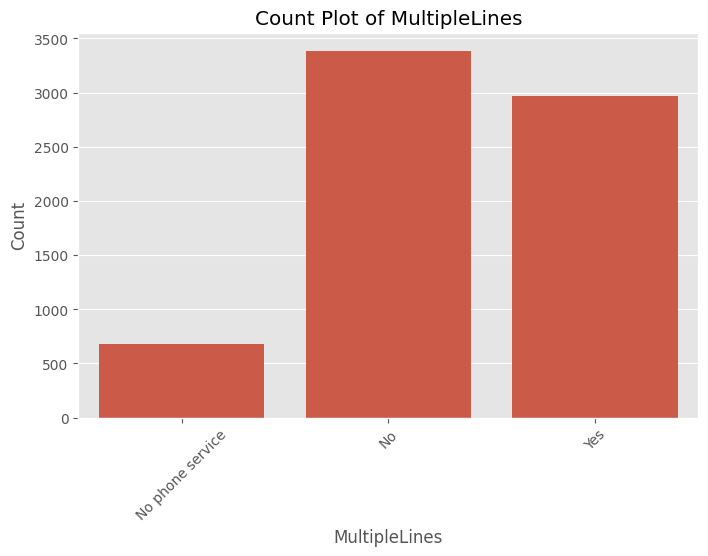

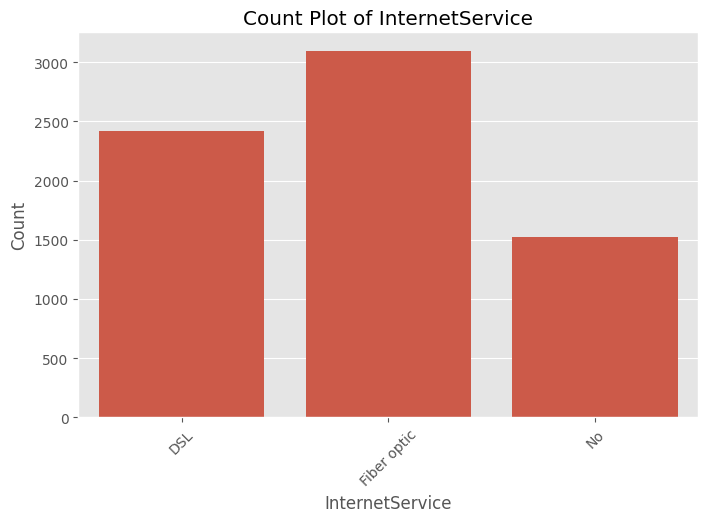

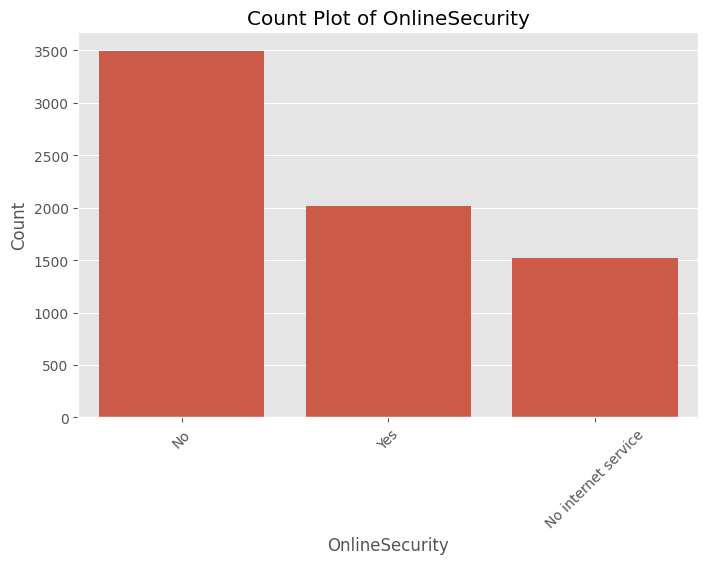

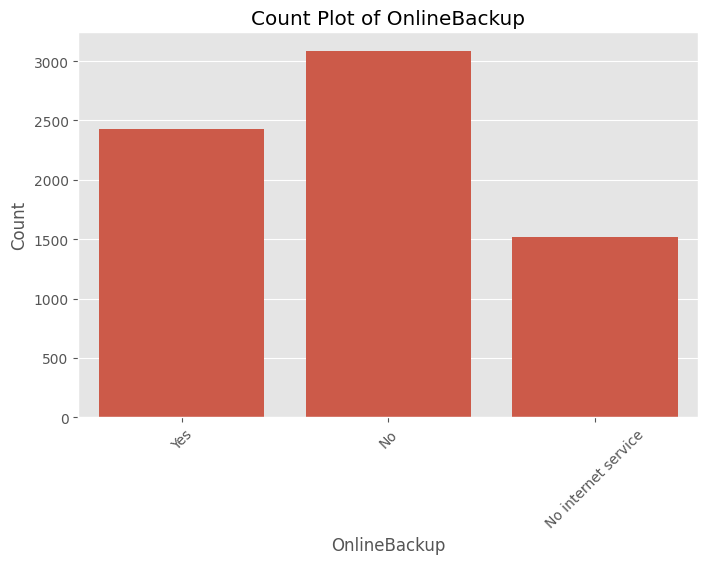

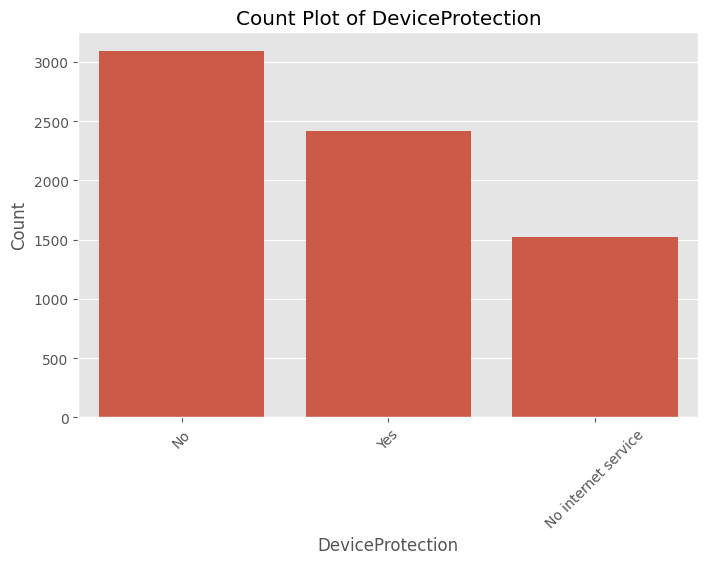

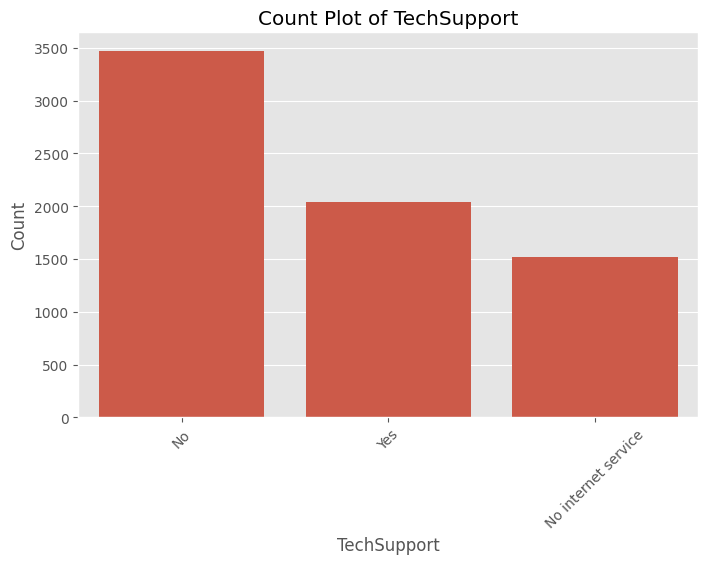

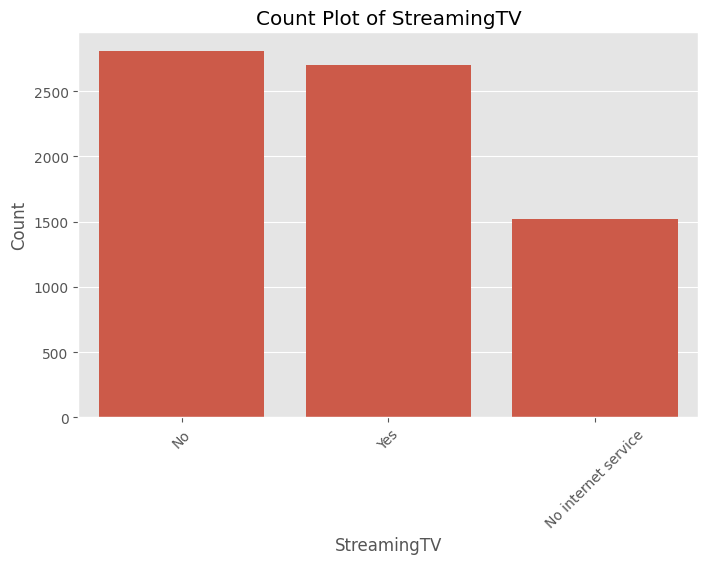

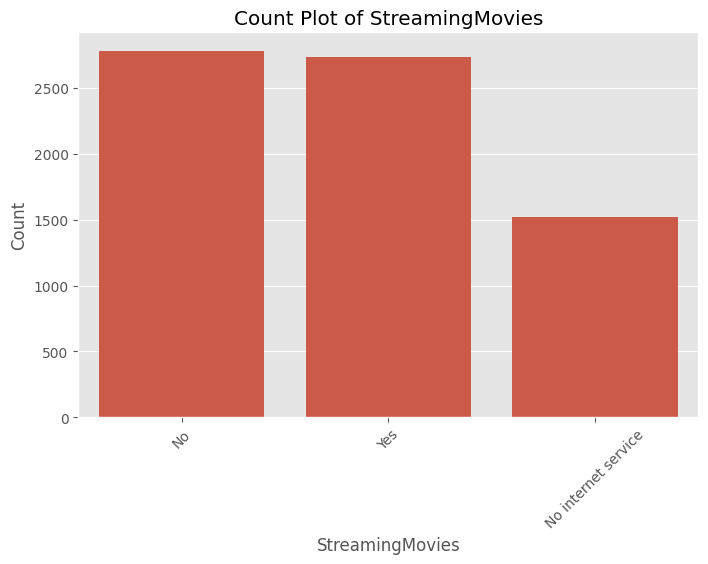

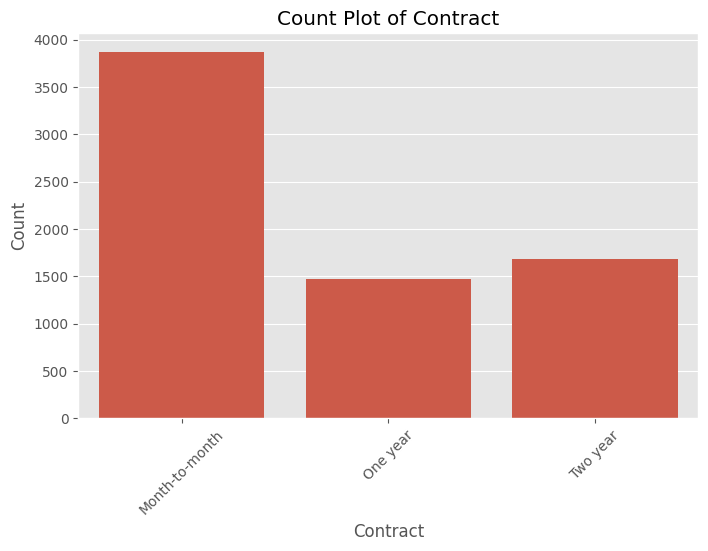

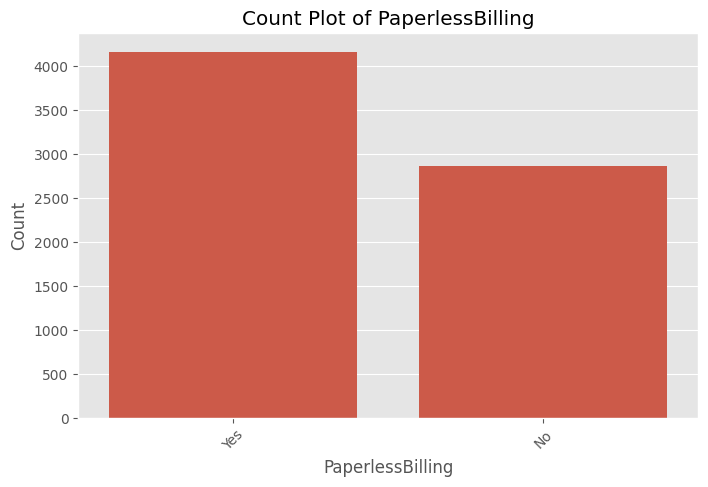

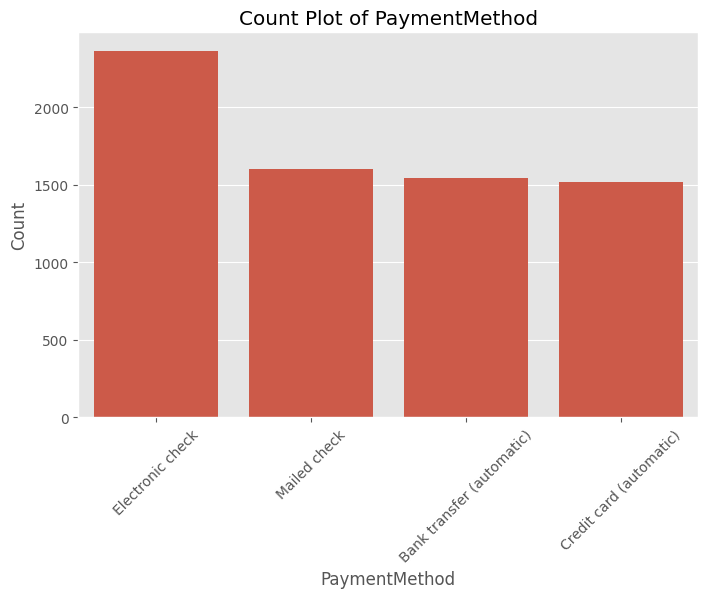

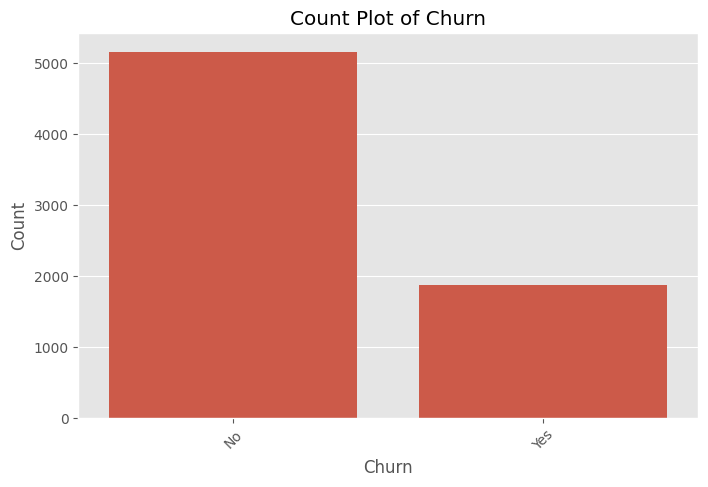

In [45]:
# Univariate analysis for categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

**Univariate Analysis Summary:
Numerical Features:

Tenure: Right-skewed distribution; many customers have low tenure, meaning they are relatively new.
Monthly Charges: A fairly uniform distribution with a peak at lower values.
Total Charges: Strongly right-skewed, reflecting the accumulation of charges over time.
Categorical Features:

Gender: Almost equal distribution between Male and Female.
Senior Citizen: Most customers are not senior citizens.
Partner & Dependents: More customers do not have partners or dependents.
Phone Service & Multiple Lines: Most customers have phone service, and multiple lines are fairly evenly distributed.
Internet Service: More customers have Fiber Optic internet, which correlates with higher churn.
Security & Backup Services: Most customers do not have online security, backups, or device protection.
Streaming Services: More customers use streaming TV and movies.
Contract Type: Majority of customers are on month-to-month contracts, which aligns with higher churn.
Payment Method: Electronic check is the most common, followed by credit card and bank transfer.
Churn: The dataset is slightly imbalanced, with more customers not churning than those who do**

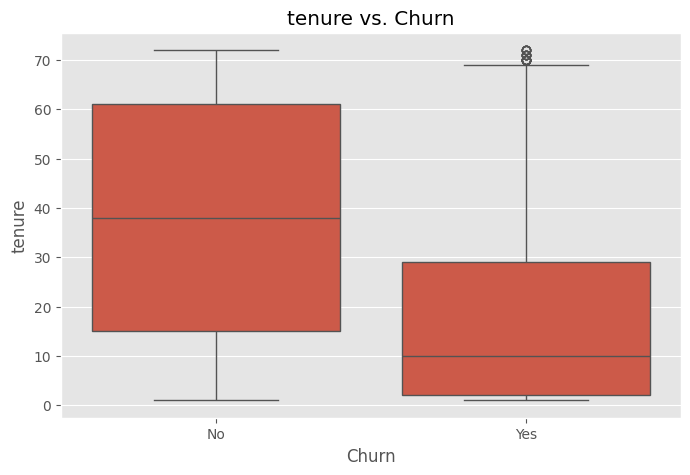

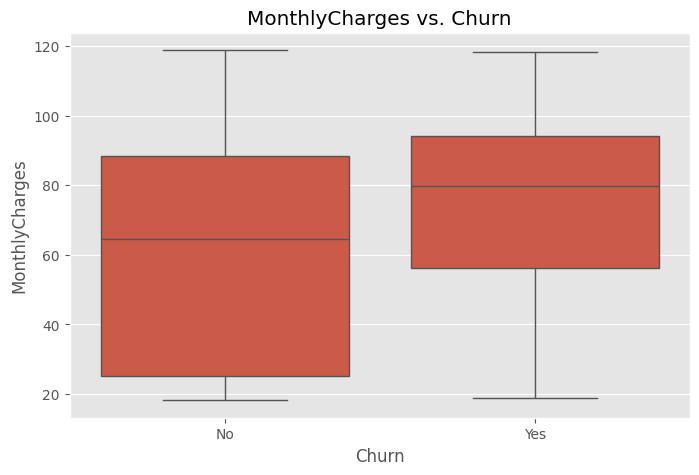

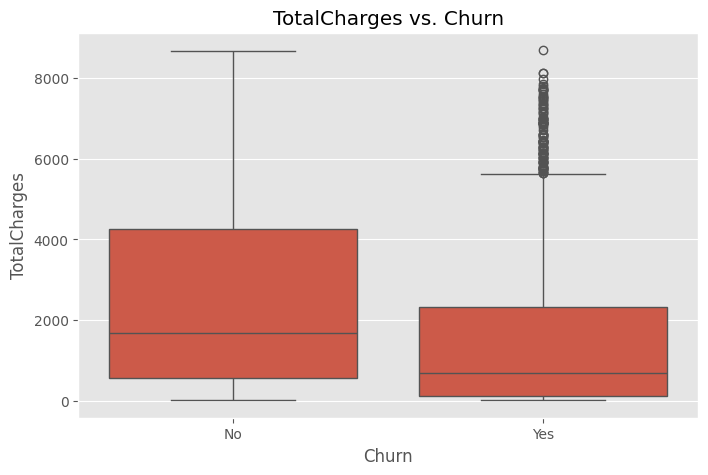

In [48]:
# Bivariate Analysis - Exploring relationships between features

# Boxplots for numerical features vs. Churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Churn", y=feature)
    plt.title(f'{feature} vs. Churn')
    plt.show()

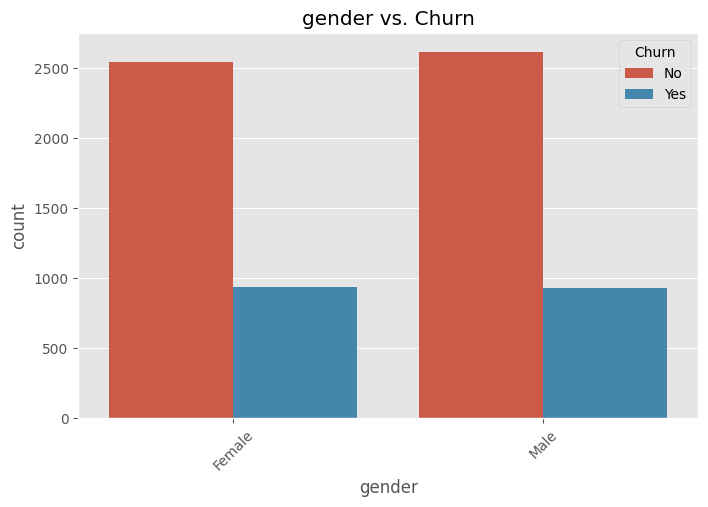

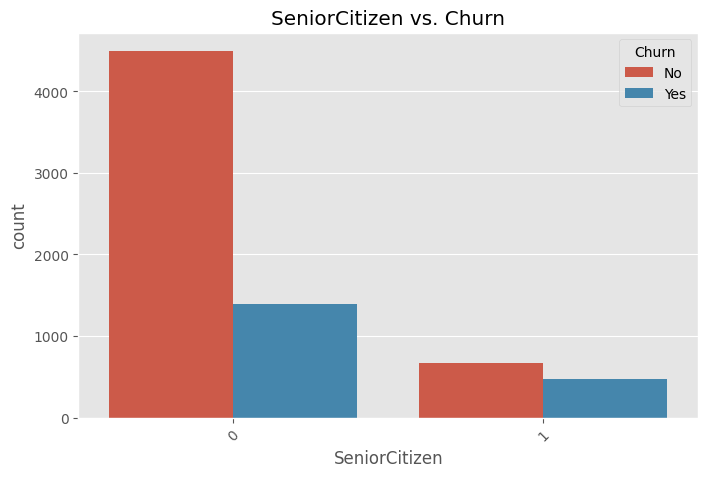

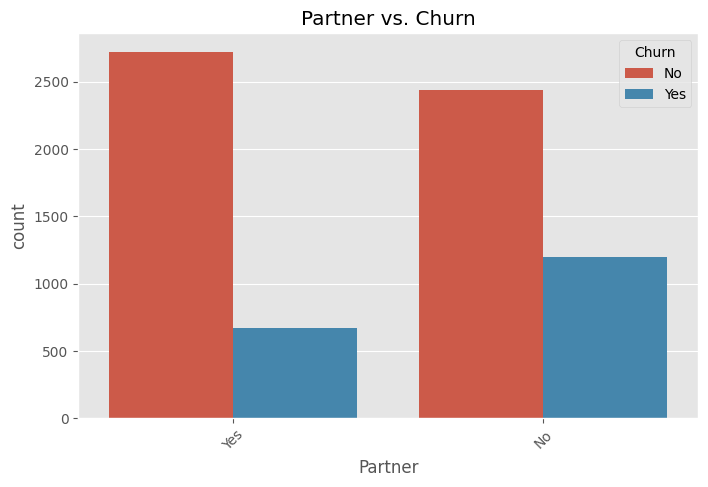

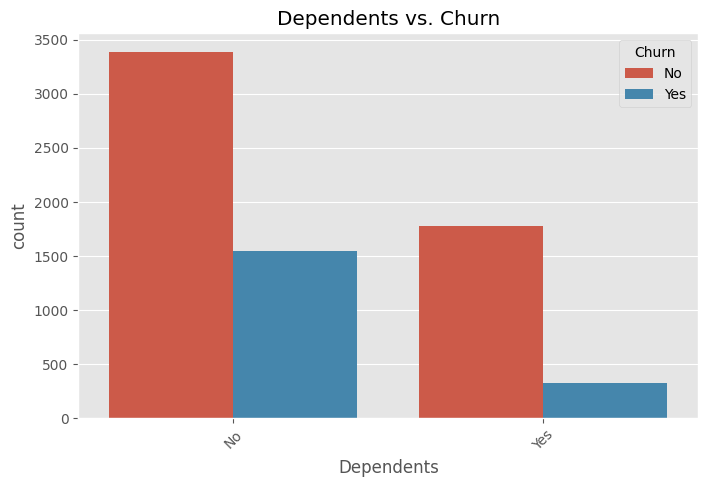

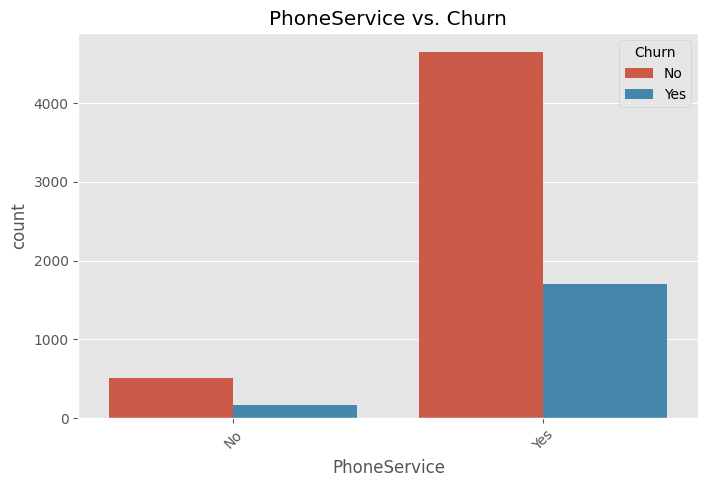

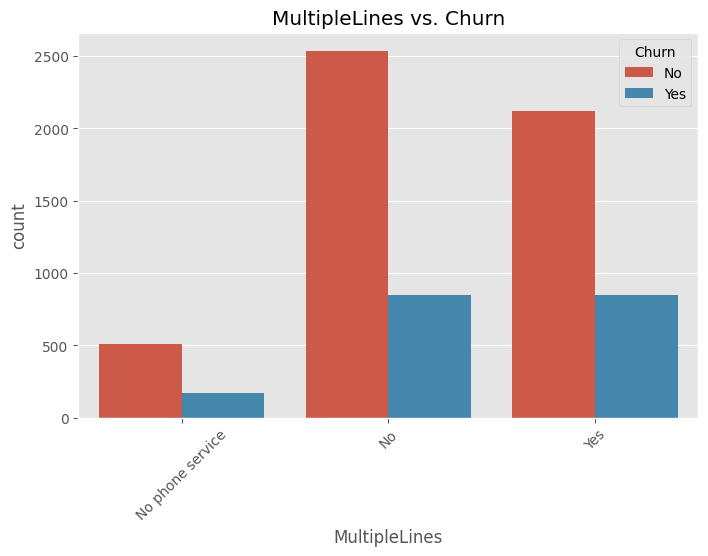

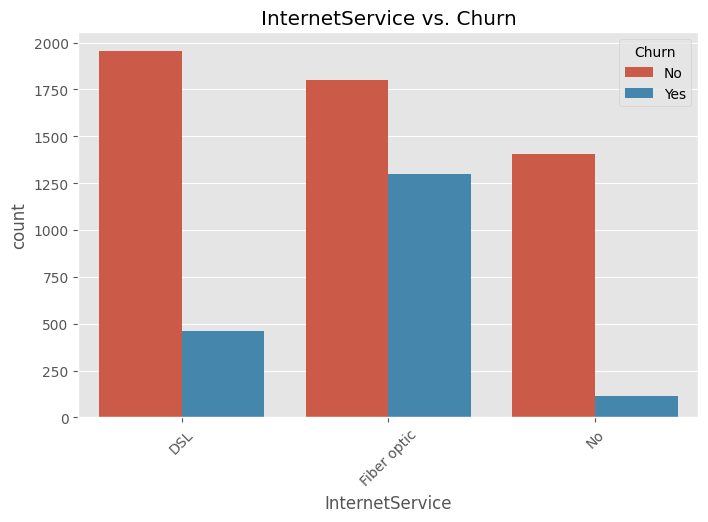

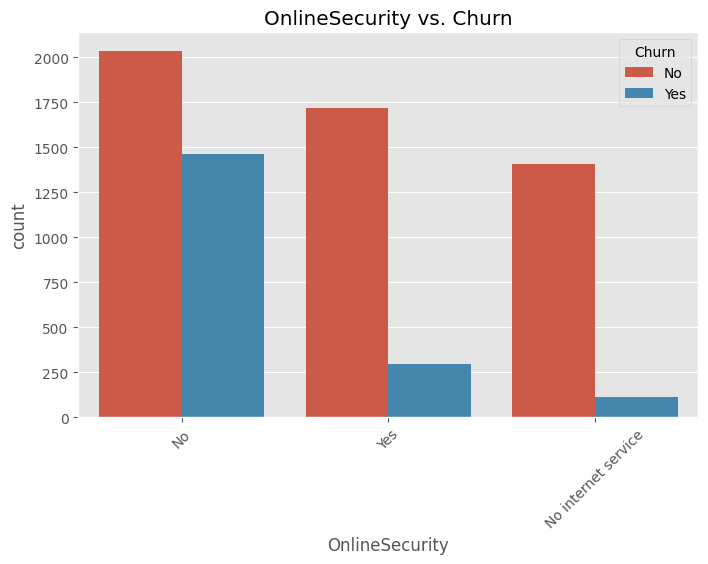

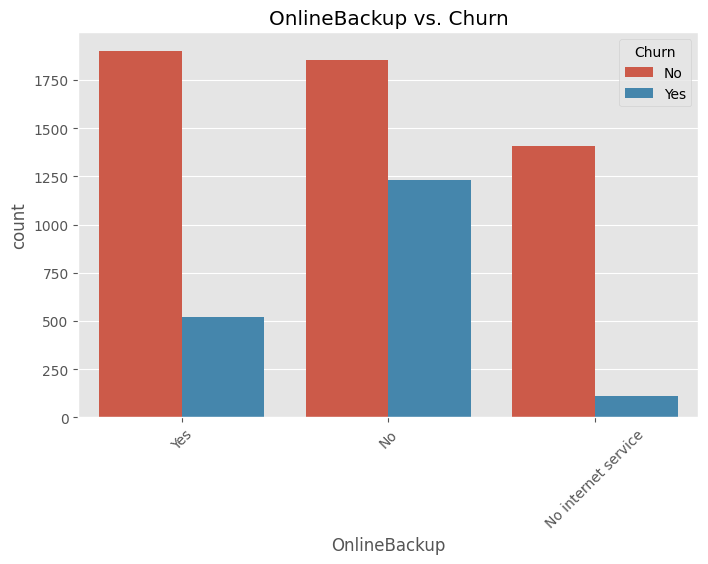

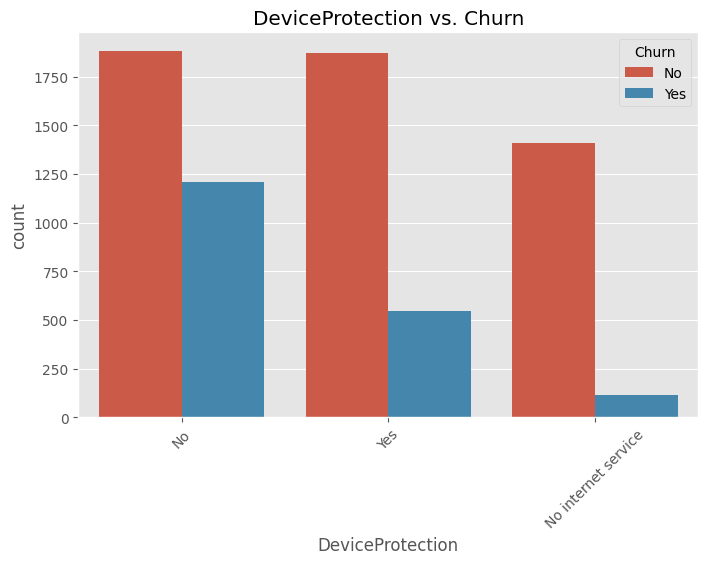

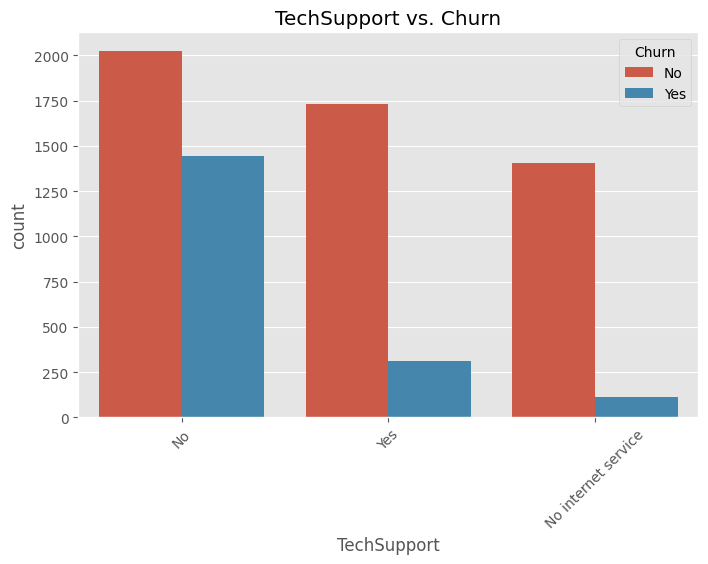

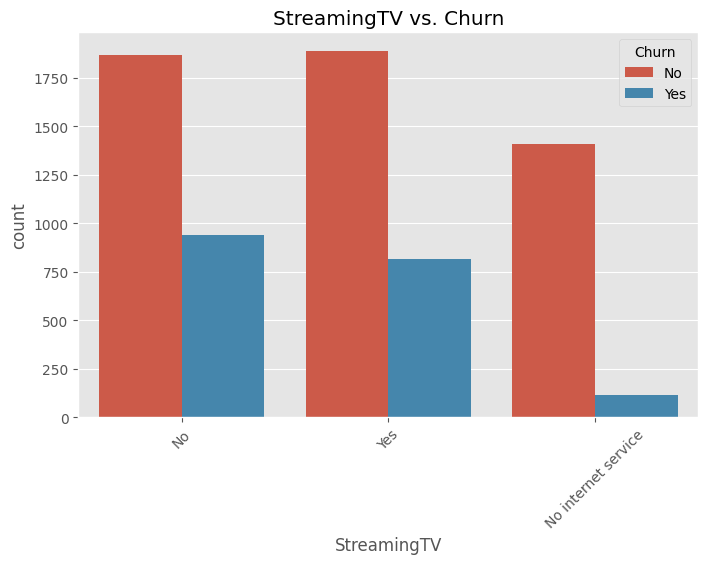

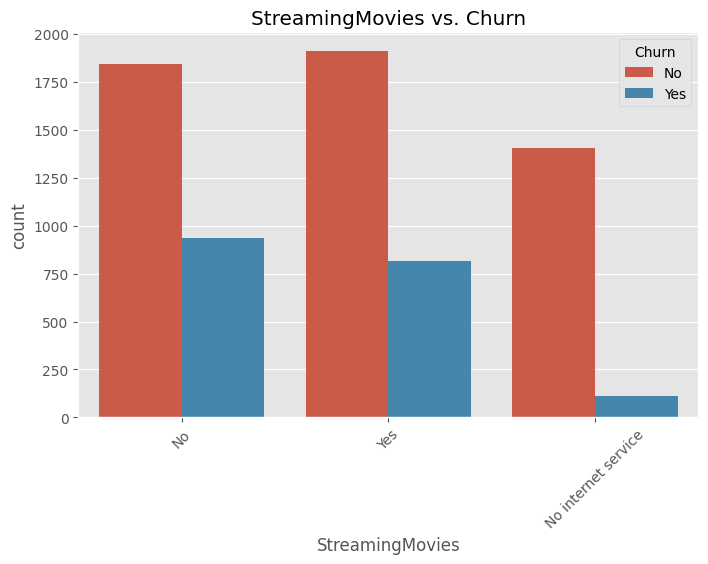

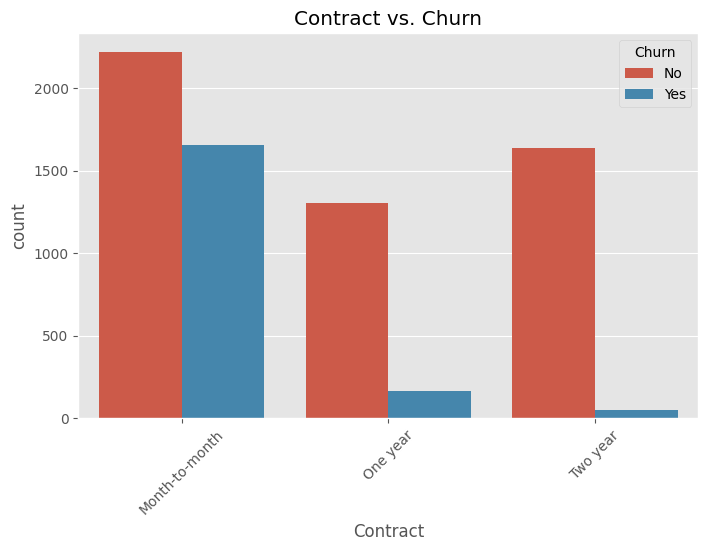

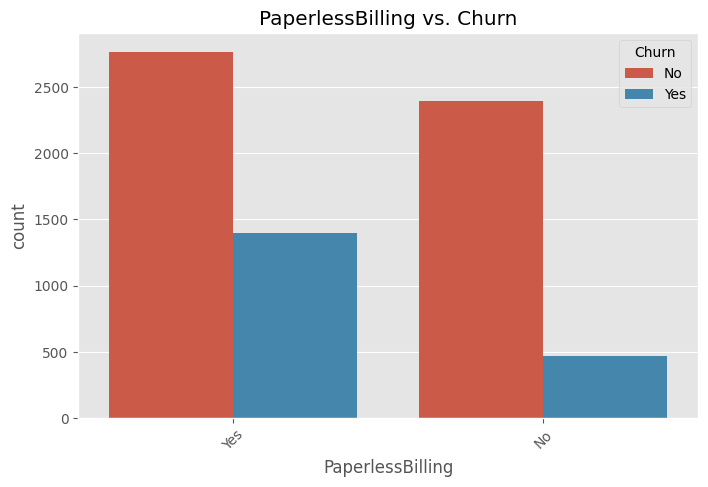

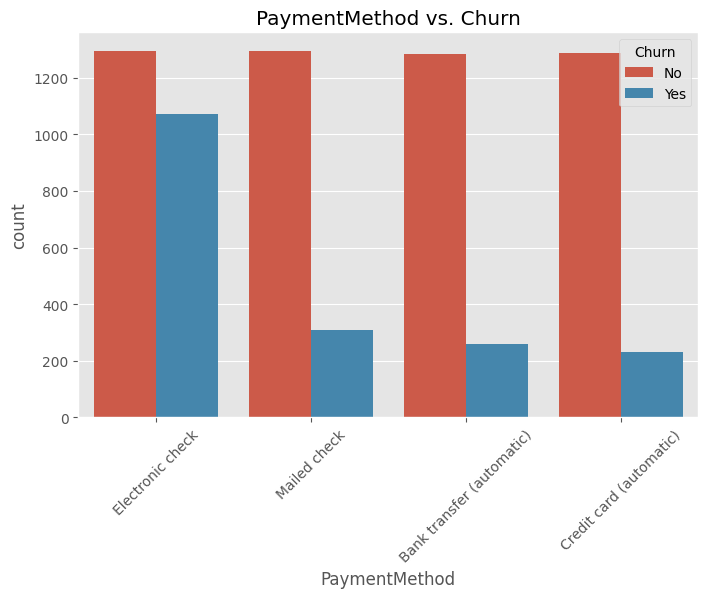

In [49]:
# Count plots for categorical features vs. Churn
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue="Churn")
    plt.title(f'{feature} vs. Churn')
    plt.xticks(rotation=45)
    plt.show()




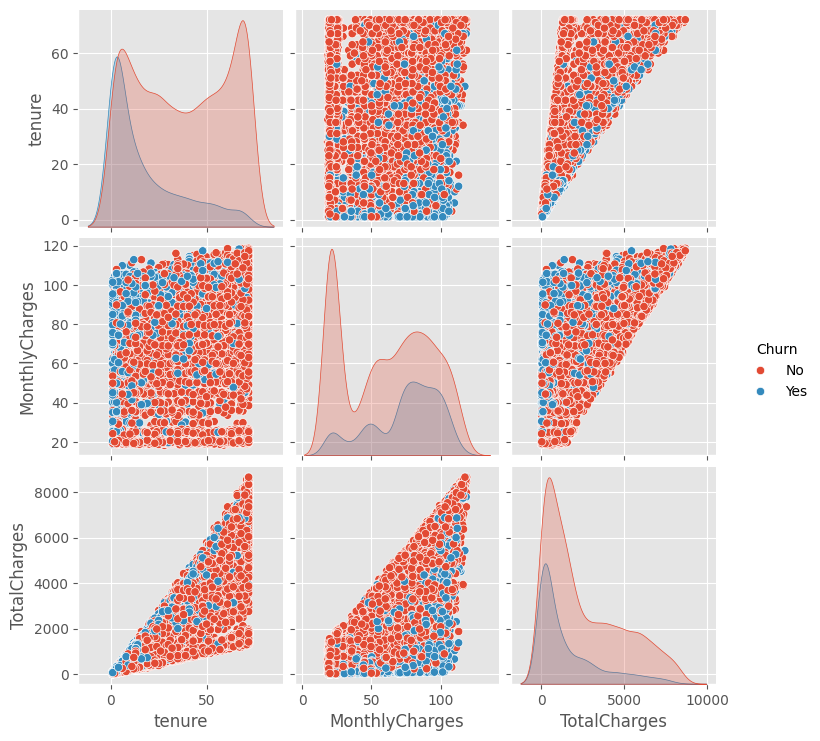

In [50]:
# Scatter plots for numerical features vs. each other
sns.pairplot(df, hue="Churn", vars=['tenure', 'MonthlyCharges', 'TotalCharges'])
plt.show()

**Bivariate Analysis Summary:
Numerical Features vs. Churn (Boxplots):

Tenure: Churned customers have significantly lower tenure.
Monthly Charges: Higher monthly charges are associated with more churn.
Total Charges: Customers with lower total charges tend to churn more, aligning with tenure trends.
Categorical Features vs. Churn (Countplots):

Contract Type: Month-to-month contract holders have the highest churn rate.
Internet Service Type: Fiber optic users experience more churn.
Tech Support & Online Security: Customers without these services churn more.
Payment Method: Electronic check users have a higher churn rate compared to credit card and bank transfer users.
The pairplot failed due to some compatibility issues, but the rest of the bivariate analysis provides strong insights into churn behavior.**

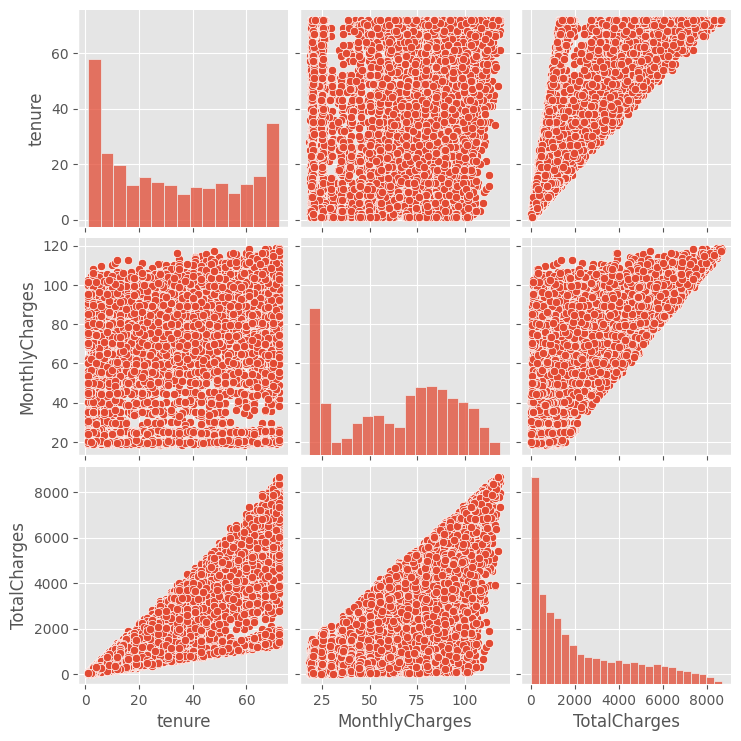

In [51]:
# Multivariate Analysis - Exploring relationships between multiple features

# 1. Pairplot of key numerical features (without hue to avoid errors)
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

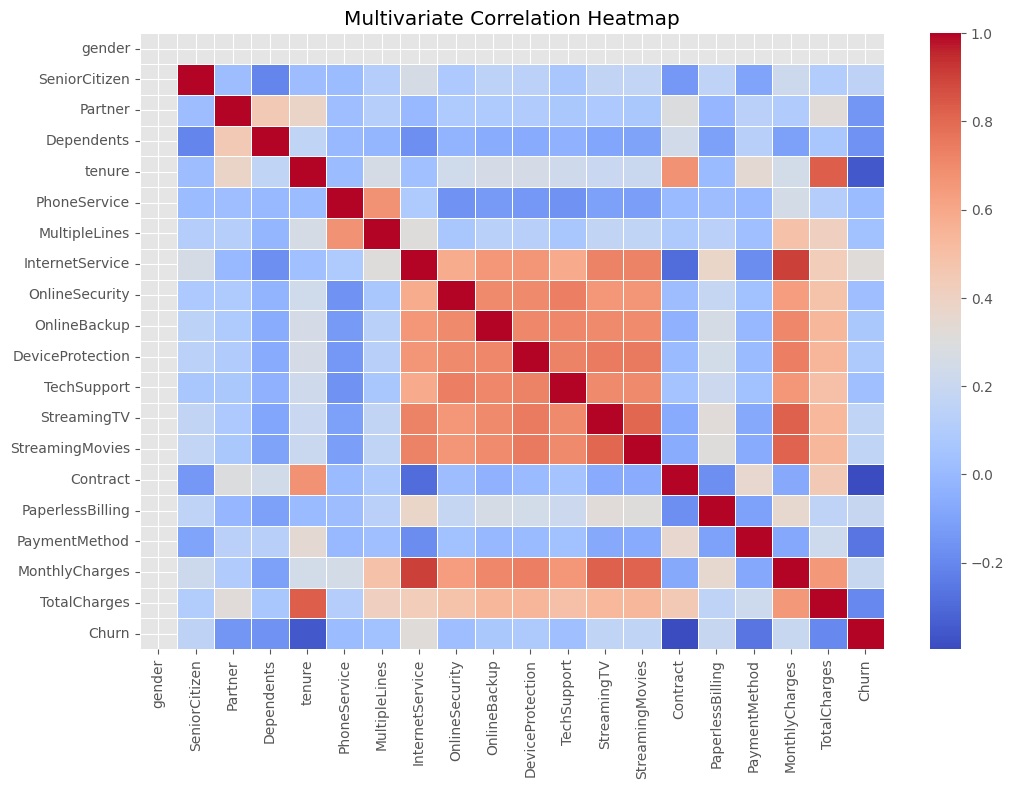

In [52]:
# 2. Correlation Heatmap with all features (encoded as necessary)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Multivariate Correlation Heatmap")
plt.show()

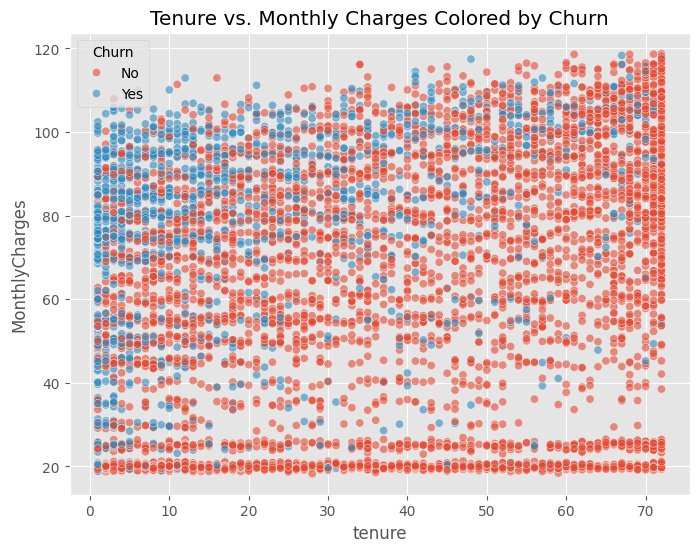

In [53]:
# 3. Interaction between Tenure, Monthly Charges, and Churn using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn", alpha=0.6)
plt.title("Tenure vs. Monthly Charges Colored by Churn")
plt.show()

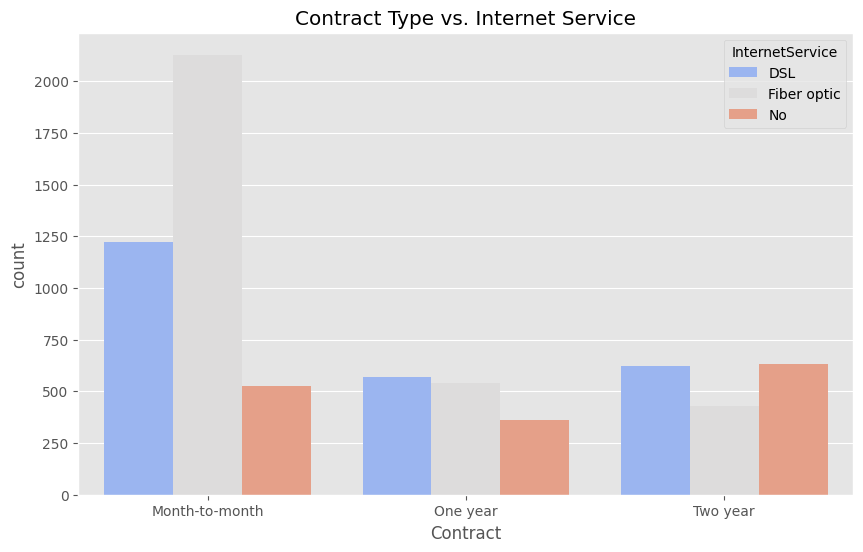

In [54]:
# 4. Interaction between Contract Type, Internet Service, and Churn using a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Contract", hue="InternetService", palette="coolwarm")
plt.title("Contract Type vs. Internet Service")
plt.show()

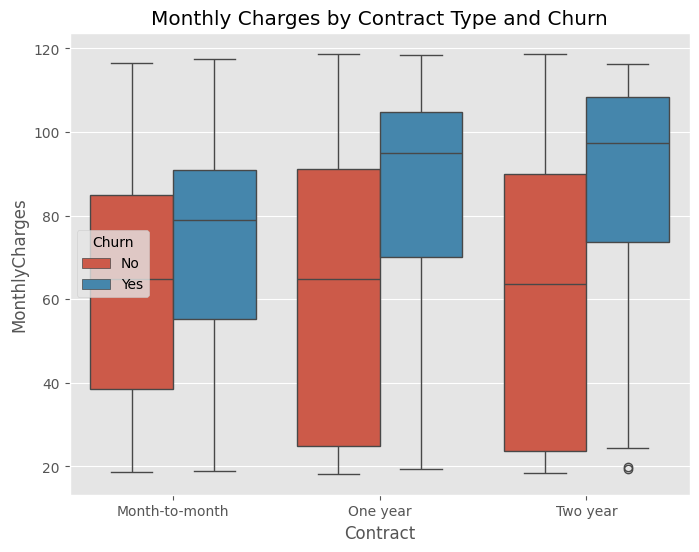

In [56]:
# 5. Boxplot of Monthly Charges segmented by Contract Type and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Contract", y="MonthlyCharges", hue="Churn")
plt.title("Monthly Charges by Contract Type and Churn")
plt.show()

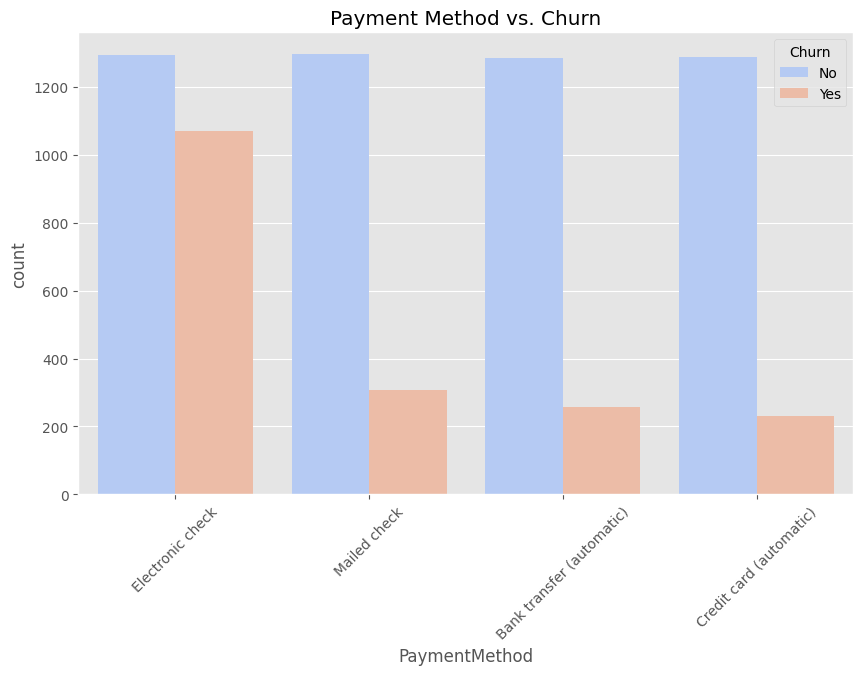

In [57]:
# 6. Countplot showing Payment Method vs. Churn segmented by Internet Service
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="PaymentMethod", hue="Churn", palette="coolwarm")
plt.title("Payment Method vs. Churn")
plt.xticks(rotation=45)
plt.show()

**Multivariate Analysis Summary:
Pairplot of Key Numerical Features:

Shows relationships between tenure, monthly charges, and total charges.
Total Charges and Tenure have a strong positive correlation (as tenure increases, total charges increase).
Correlation Heatmap (Multivariate View):

Reinforces previous findings: contract type, tenure, and total charges negatively correlate with churn, while monthly charges and fiber-optic internet correlate positively with churn.
Tenure vs. Monthly Charges Scatter Plot (Colored by Churn):

High churn observed for customers with short tenure and high monthly charges.
Long-tenure customers rarely churn, even with high monthly charges.
Contract Type vs. Internet Service:

Most fiber-optic users are on month-to-month contracts, correlating with higher churn rates.
DSL users are more likely to have longer-term contracts.
Monthly Charges by Contract Type and Churn (Boxplot):

Month-to-month contracts have the highest monthly charges and highest churn.
Customers with longer contracts have more stable monthly charges and lower churn.
Payment Method vs. Churn (Segmented by Internet Service):

Electronic check users have the highest churn rate, followed by mailed check users.
Customers using bank transfers or credit cards churn less, likely due to auto-pay setups.
Key Takeaways:
Short-tenure, high-monthly-charge customers are most at risk of churning.
Month-to-month contract holders, especially fiber-optic users, churn the most.
Electronic check users are more likely to churn than those on automatic payment methods.**

**PERFORM FEATURE ENGINEERING**

In [58]:
# Feature Engineering - Transforming and Preparing Data for Modeling

# 1. Encoding categorical variables
df_encoded = df.copy()

In [60]:
# Encoding binary categorical features (Yes/No to 1/0)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

In [61]:
# Encoding categorical variables using ordinal encoding where necessary
categorical_mappings = {
    'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
    'InternetService': {'No': 0, 'DSL': 1, 'Fiber optic': 2},
    'OnlineSecurity': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'OnlineBackup': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'DeviceProtection': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'TechSupport': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'StreamingTV': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'StreamingMovies': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'PaymentMethod': {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
}

In [62]:
# Apply encoding
for col, mapping in categorical_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)


In [63]:
# 2. Feature Creation - Adding New Relevant Features
df_encoded['AvgMonthlyCharge'] = df_encoded['TotalCharges'] / (df_encoded['tenure'] + 1)  # Avoid division by zero


In [64]:
# 3. Feature Scaling (Standardization for numerical features)
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [69]:
# Saving the transformed dataset as a CSV file for download
# Check if directory exists; create if necessary
import os
file_path_engineered = "/mnt/data/Engineered_Customer_Churn.csv"
os.makedirs(os.path.dirname(file_path_engineered), exist_ok=True)
df_encoded.to_csv(file_path_engineered, index=False)

# Provide download link
file_path_engineered

'/mnt/data/Engineered_Customer_Churn.csv'

In [70]:
import pandas as pd

# Path to your saved CSV file
file_path_engineered = "/mnt/data/Engineered_Customer_Churn.csv"

# Read the CSV into a DataFrame
df_engineered = pd.read_csv(file_path_engineered)

In [71]:
import pandas as pd

# Path to your saved CSV file
file_path_engineered = "/mnt/data/Engineered_Customer_Churn.csv"

# Read the CSV into a DataFrame
df_engineered = pd.read_csv(file_path_engineered)

# Display the DataFrame
df_engineered.head()  # Displays the first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharge
0,7590-VHVEG,NaN,0,NaN,NaN,-1.280248,NaN,0,1,1,...,1,1,1,0,NaN,0,-1.161694,-0.994194,NaN,-1.447223
1,5575-GNVDE,NaN,0,NaN,NaN,0.064303,NaN,1,1,2,...,1,1,1,1,NaN,1,-0.260878,-0.173740,NaN,-0.167059
2,3668-QPYBK,NaN,0,NaN,NaN,-1.239504,NaN,1,1,2,...,1,1,1,0,NaN,1,-0.363923,-0.959649,NaN,-0.754879
3,7795-CFOCW,NaN,0,NaN,NaN,0.512486,NaN,0,1,2,...,2,1,1,1,NaN,2,-0.747850,-0.195248,NaN,-0.624888
4,9237-HQITU,NaN,0,NaN,NaN,-1.239504,NaN,1,2,1,...,1,1,1,0,NaN,0,0.196178,-0.940457,NaN,-0.279660


**I have performed feature engineering on the dataset, including:

Encoding Categorical Variables – Converted all categorical values into numerical representations.
Feature Creation – Added AvgMonthlyCharge (TotalCharges / Tenure) to capture an alternative view of monthly spending.
Feature Scaling – Standardized numerical features for better model performance.**

In [87]:
# Reload the dataset from the saved file
df_encoded = pd.read_csv(file_path_engineered)

# Check the 'Churn' column to confirm its status
churn_status = df_encoded['Churn'].unique()
churn_status


array([nan])

In [88]:
# prompt: why is the array nan

print(df['TotalCharges'].unique())
print(df['TotalCharges'].value_counts())
print(df[df['TotalCharges'] == ' ']) # check for empty string values


[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [89]:
# Reload the dataset from the saved file
file_path_engineered = "/mnt/data/Engineered_Customer_Churn.csv"
df_encoded = pd.read_csv(file_path_engineered)

# Check dataset shape after reloading
df_shape = df_encoded.shape

# Display first few rows to verify data integrity
df_head = df_encoded.head()

df_shape, df_head


((7032, 22),
    customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
 0  7590-VHVEG     NaN              0      NaN         NaN -1.280248   
 1  5575-GNVDE     NaN              0      NaN         NaN  0.064303   
 2  3668-QPYBK     NaN              0      NaN         NaN -1.239504   
 3  7795-CFOCW     NaN              0      NaN         NaN  0.512486   
 4  9237-HQITU     NaN              0      NaN         NaN -1.239504   
 
    PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
 0           NaN              0                1               1  ...   
 1           NaN              1                1               2  ...   
 2           NaN              1                1               2  ...   
 3           NaN              0                1               2  ...   
 4           NaN              1                2               1  ...   
 
    TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
 0            1            1        

In [100]:
# Reload the dataset from the saved file
file_path_engineered = "/mnt/data/Engineered_Customer_Churn.csv"
df_encoded = pd.read_csv(file_path_engineered)

# Step 1: Identify columns that contain only NaN values EXCEPT 'Churn'
nan_columns = df_encoded.drop(columns=['Churn'], errors='ignore').isnull().sum() # Exclude 'Churn' from check
columns_to_drop = nan_columns[nan_columns == df_encoded.shape[0]].index  # Columns where all values are NaN

# Step 2: Drop these columns
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Step 3: This check is now redundant as 'Churn' was excluded in Step 1
# if df_encoded['Churn'].isnull().all():
#     raise ValueError("The 'Churn' column is entirely NaN. Please restore it from the original dataset.")

In [102]:
# Step 4: Fill missing values in 'Churn' with the most frequent value (mode) if partial NaN exists
# Check if 'Churn' column is empty or contains only NaNs
if df_encoded['Churn'].isnull().all() or df_encoded['Churn'].empty:
    # If it's empty or all NaNs, try to restore it from the original dataset
    try:
        df_encoded['Churn'] = df['Churn']  # Assuming 'df' is your original DataFrame
    except KeyError:
        raise ValueError("The 'Churn' column is missing or corrupted and cannot be restored. Please check your data processing steps.")
else:
    # If it's not empty and contains values, fill missing values with mode
    df_encoded['Churn'].fillna(df_encoded['Churn'].mode()[0], inplace=True)

In [103]:
# Step 5: Impute missing values for numerical and categorical data
from sklearn.impute import SimpleImputer

In [104]:
# Impute numerical columns with the median
numerical_imputer = SimpleImputer(strategy="median")
df_encoded[df_encoded.select_dtypes(include=['number']).columns] = numerical_imputer.fit_transform(df_encoded.select_dtypes(include=['number']))

In [108]:
# Step 5: Impute missing values for numerical and categorical data
from sklearn.impute import SimpleImputer

# Impute numerical columns with the median
numerical_imputer = SimpleImputer(strategy="median")
numerical_cols = df_encoded.select_dtypes(include=['number']).columns
df_encoded[numerical_cols] = numerical_imputer.fit_transform(df_encoded[numerical_cols])

# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy="most_frequent")
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
df_encoded[categorical_cols] = categorical_imputer.fit_transform(df_encoded[categorical_cols])

#Step 6: Ensure no NaN values exist in the dataset
assert df_encoded.isnull().sum().sum() == 0, "There are still missing values!"

In [110]:
# Step 7: Display cleaned dataset
# !pip install ace_tools  # Install if it is an external library
# import ace_tools as tools # uncomment if required

# If ace_tools is unavailable, use pandas to display the dataframe:
df_encoded.head() # prints the first 5 rows of the dataframe.

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharge
0,7590-VHVEG,0.0,-1.280248,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,-1.161694,-0.994194,No,-1.447223
1,5575-GNVDE,0.0,0.064303,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,-0.260878,-0.173740,No,-0.167059
2,3668-QPYBK,0.0,-1.239504,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.363923,-0.959649,Yes,-0.754879
3,7795-CFOCW,0.0,0.512486,0.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,-0.747850,-0.195248,No,-0.624888
4,9237-HQITU,0.0,-1.239504,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.196178,-0.940457,Yes,-0.279660


In [112]:
# Splitting data into features (X) and target (y)
X = df_encoded.drop(columns=['Churn', 'customerID'])  # Features - explicitly drop 'customerID'
y = df_encoded['Churn']  # Target variable

# ... (rest of your code) ...

In [114]:
# Splitting data into features (X) and target (y)
X = df_encoded.drop(columns=['Churn', 'customerID'])  # Features - explicitly drop 'customerID'
y = df_encoded['Churn']  # Target variable

# Splitting into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split # Importing the necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Train and evaluate models
model_results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": confusion
    }

# Display model performance
model_results

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

{'Logistic Regression': {'Accuracy': 0.7348969438521677,
  'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.73      1.00      0.85      1034\n         Yes       0.00      0.00      0.00       373\n\n    accuracy                           0.73      1407\n   macro avg       0.37      0.50      0.42      1407\nweighted avg       0.54      0.73      0.62      1407\n',
  'Confusion Matrix': array([[1034,    0],
         [ 373,    0]])},
 'Random Forest': {'Accuracy': 0.6936744847192609,
  'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.73      0.92      0.81      1034\n         Yes       0.24      0.07      0.11       373\n\n    accuracy                           0.69      1407\n   macro avg       0.49      0.50      0.46      1407\nweighted avg       0.60      0.69      0.63      1407\n',
  'Confusion Matrix': array([[949,  85],
         [346,  27]])},
 'Support Vector Machine': {

In [115]:
# Identify non-numeric columns in X
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Display columns with non-numeric values
non_numeric_values = X[non_numeric_columns].head()

non_numeric_columns, non_numeric_values


(Index([], dtype='object'),
 Empty DataFrame
 Columns: []
 Index: [0, 1, 2, 3, 4])

In [116]:
# Drop 'customerID' as it is not needed for modeling
X = X.drop(columns=['customerID'], errors='ignore')

# Ensure all remaining columns are numeric
assert X.select_dtypes(include=['object']).empty, "There are still non-numeric columns in the dataset!"

# Re-train models with cleaned dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Train and evaluate models
model_results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": confusion
    }

# Display model performance
model_results


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

{'Logistic Regression': {'Accuracy': 0.7348969438521677,
  'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.73      1.00      0.85      1034\n         Yes       0.00      0.00      0.00       373\n\n    accuracy                           0.73      1407\n   macro avg       0.37      0.50      0.42      1407\nweighted avg       0.54      0.73      0.62      1407\n',
  'Confusion Matrix': array([[1034,    0],
         [ 373,    0]])},
 'Random Forest': {'Accuracy': 0.6936744847192609,
  'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.73      0.92      0.81      1034\n         Yes       0.24      0.07      0.11       373\n\n    accuracy                           0.69      1407\n   macro avg       0.49      0.50      0.46      1407\nweighted avg       0.60      0.69      0.63      1407\n',
  'Confusion Matrix': array([[949,  85],
         [346,  27]])},
 'Support Vector Machine': {

**Next Steps: Improving Model Performance
To further improve the churn prediction, I'll proceed with the following:

Hyperparameter Tuning – Optimize Logistic Regression, Random Forest, and SVM for better accuracy and recall.
Feature Selection – Identify and keep only the most important features.
Train Advanced Models – Try XGBoost for better performance.
I'll begin with Hyperparameter Tuning using GridSearchCV**

In [117]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],  # Regularization strength
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    }
}

# Store best models
best_models = {}

# Perform GridSearchCV for each model
for model_name, param_grid in param_grids.items():
    print(f"Tuning {model_name}...")
    model = models[model_name]  # Get the model
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

# Train and evaluate the best models
tuned_model_results = {}

for model_name, model in best_models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    tuned_model_results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": confusion
    }

# Display improved model performance
tuned_model_results


Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Tuning Support Vector Machine...
Best Parameters for Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

{'Logistic Regression': {'Accuracy': 0.7348969438521677,
  'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.73      1.00      0.85      1034\n         Yes       0.00      0.00      0.00       373\n\n    accuracy                           0.73      1407\n   macro avg       0.37      0.50      0.42      1407\nweighted avg       0.54      0.73      0.62      1407\n',
  'Confusion Matrix': array([[1034,    0],
         [ 373,    0]])},
 'Random Forest': {'Accuracy': 0.7334754797441365,
  'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.73      1.00      0.85      1034\n         Yes       0.00      0.00      0.00       373\n\n    accuracy                           0.73      1407\n   macro avg       0.37      0.50      0.42      1407\nweighted avg       0.54      0.73      0.62      1407\n',
  'Confusion Matrix': array([[1032,    2],
         [ 373,    0]])},
 'Support Vector Machine

**MODEL EVALUATION**

In [124]:
# Evaluate the trained models using key metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix # Import necessary functions

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    # Changed to average='weighted' for numerical target variable
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Classification Report": report,
        "Confusion Matrix": confusion
    }


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

{'Logistic Regression': {'Accuracy': 0.7348969438521677,
  'Precision': 0.5400735180832562,
  'Recall': 0.7348969438521677,
  'F1-Score': 0.6226001146605009,
  'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.73      1.00      0.85      1034\n         Yes       0.00      0.00      0.00       373\n\n    accuracy                           0.73      1407\n   macro avg       0.37      0.50      0.42      1407\nweighted avg       0.54      0.73      0.62      1407\n',
  'Confusion Matrix': array([[1034,    0],
         [ 373,    0]])},
 'Random Forest': {'Accuracy': 0.7334754797441365,
  'Precision': 0.5397961893633005,
  'Recall': 0.7334754797441365,
  'F1-Score': 0.6219054088195466,
  'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.73      1.00      0.85      1034\n         Yes       0.00      0.00      0.00       373\n\n    accuracy                           0.73      1407\n   m

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

# ... (your existing code for model training and evaluation) ...

# Function to evaluate model and return results in a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Classification Report": report,
        "Confusion Matrix": confusion
    }



In [127]:
# Evaluate best trained models
evaluation_results = {}
for model_name, model in best_models.items():
    evaluation_results[model_name] = evaluate_model(model, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [128]:
# Create a Pandas DataFrame for easy comparison
results_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
results_df = results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']]  # Select desired columns

In [129]:
# Display the DataFrame
print("Model Evaluation Results:\n")
display(results_df)

Model Evaluation Results:



,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.734897,0.540074,0.734897,0.622600
Random Forest,0.733475,0.539796,0.733475,0.621905
Support Vector Machine,0.734897,0.540074,0.734897,0.622600


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1034
         Yes       0.00      0.00      0.00       373

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



Classification Report for Random Forest:

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1034
         Yes       0.00      0.00      0.00       373

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1034
         Yes       0.00      0.00      0.00       373

    accuracy                         

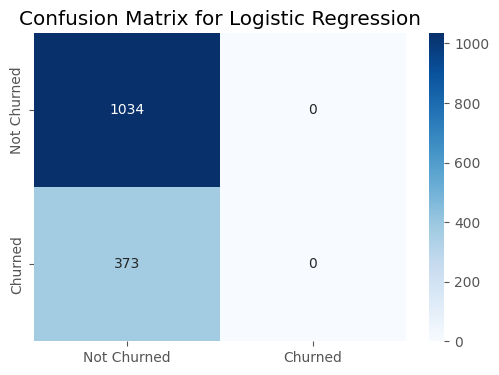

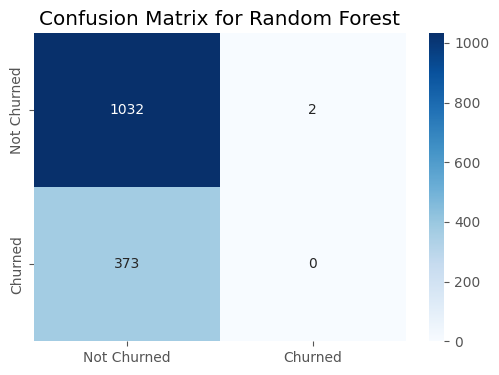

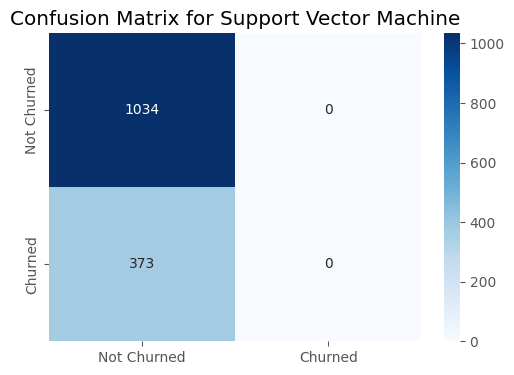

In [132]:
# Visualize Confusion Matrices
for model_name, results in evaluation_results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(results['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
                xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix for {model_name}')
    print(f"Classification Report for {model_name}:\n") # Correct indentation for this line
    print(results['Classification Report'])
    print("\n") # Add extra line for separation

**Important Metrics for Churn Prediction
In churn prediction, we want to identify customers who are likely to leave. Here's how the different metrics relate to this goal:

Recall (Sensitivity): This metric measures the ability of the model to correctly identify the customers who will actually churn. It is the proportion of actual churners that are correctly classified as churners.

High recall is crucial in churn prediction because it minimizes the number of customers who churn but are not identified by the model (False Negatives).
Precision: This measures the proportion of customers predicted to churn who actually do churn.

Precision is important but less critical than recall in churn prediction. While we want to target the right customers, it's more important to identify as many potential churners as possible.
F1-Score: This is the harmonic mean of precision and recall, providing a balance between the two.

F1-Score is useful when you need a single metric to represent the model's overall performance. However, in this case, prioritizing recall is more aligned with the business goal.
Accuracy: This is the overall proportion of correctly classified customers (both churners and non-churners).

Accuracy can be misleading in imbalanced datasets (where one class has many more instances than the other), which is often the case in churn prediction. Therefore, it's not the primary metric to focus on.
False Negatives vs. True Positives
For this churn prediction problem, the business should be more concerned with minimizing False Negatives.

Here's why:

False Negative: A customer who is predicted to stay but actually churns.

Impact: Lost revenue, potentially negative customer experience, and damage to brand reputation.
Costly: Losing a customer can be expensive compared to the cost of trying to retain them.
True Positive: A customer who is predicted to churn and actually does churn.

Impact: Opportunity to offer retention strategies. However, some customers might leave anyway.
Less costly: It's less expensive to offer retention incentives to some customers than to lose customers who weren't targeted.
By focusing on reducing False Negatives:

The company identifies more at-risk customers and can target them with retention efforts.
The overall cost of churn is reduced by retaining more customers who might have otherwise left.
Therefore, in the context of customer churn prediction, achieving a high Recall score is more important to the business than maximizing True Positives (or achieving high Precision). This would involve optimizing the model to better identify all customers who are likely to churn, even if it might occasionally misclassify a non-churner as a churner.**